In [82]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter warnings
data = pd.read_csv('../data/raw/countries.csv')

In [83]:
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [84]:
# want data from 2007
data_2007 = data[data.year == 2007]
# want gdp = gdp per cap * pop
data_2007['gdp'] = data_2007.gdpPerCapita*data_2007.population
# want top 10 pop
data_2007_top10pop = data_2007.sort_values('population').tail(10)
data_2007_top10pop_gdp = data_2007_top10pop.sort_values('gdp')

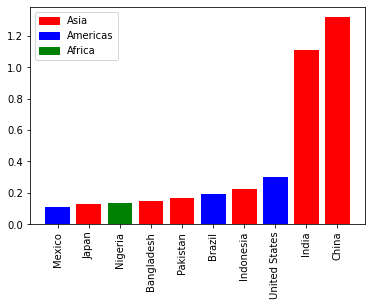

In [85]:
# want sorted top 10 pop by continent
cmap = {'Asia':'r','Americas':'b','Africa':'g'} # cmap for continent

ind = np.arange(10)
plt.bar(
    ind
    ,data_2007_top10pop.population/10**9
    ,color=[cmap[i] for i in data_2007_top10pop.continent]
)
plt.legend( # create legend based on cmap
    [plt.Rectangle(
        (0,0)
        ,0
        ,0
        ,color=cmap[label]
    ) for label in cmap.keys()
    ]
    ,cmap.keys()
)
plt.xticks(
    ind
    ,data_2007_top10pop.country
    ,rotation=90
)
plt.show()

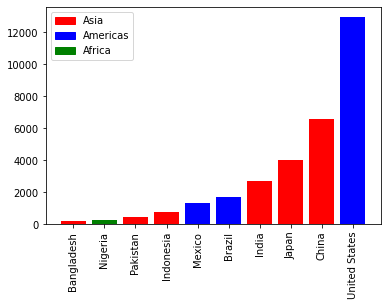

In [86]:
# want sorted top 10 gdp by continent
cmap = {'Asia':'r','Americas':'b','Africa':'g'} # cmap by continent

ind = np.arange(10)
plt.bar(
    ind
    ,data_2007_top10pop_gdp.gdp/10**9
    ,color=[cmap[i] for i in data_2007_top10pop_gdp.continent]
)
plt.legend([ # create legend based on cmap
    plt.Rectangle(
        (0,0)
        ,0
        ,0
        ,color=cmap[label]
    ) for label in cmap.keys()
    ]
    ,cmap.keys()
)
plt.xticks(
    ind
    ,data_2007_top10pop_gdp.country
    ,rotation=90
)
plt.show()

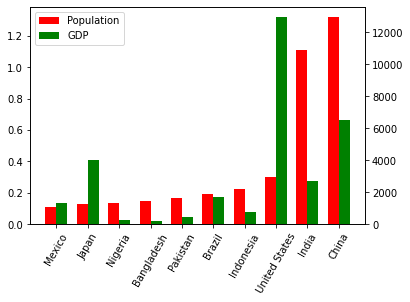

In [87]:
# combine the two
w = .35
ind = np.arange(10)

# create initial plot
fig, ax = plt.subplots()

# plot 1 population
plt.xticks(
    ind+w/2 # plot x ticks in the middle of our two bars
    ,data_2007_top10pop.country
    ,rotation=60
)
bar1 = ax.bar(
    ind
    ,data_2007_top10pop.population/10**9
    ,w
    ,color='r'
)
ax.legend(
    (bar1[0], bar2[0])
    ,('Population', 'GDP')
)

# plot 2 gdp
ax2 = ax.twinx()
bar2 = ax2.bar(
    ind+w
    ,data_2007_top10pop.gdp/10**9
    ,w
    ,color='g'
)
plt.show()